In [6]:
## Desired delta
diff = 3

In [10]:
## Paths to videos and labels folders
path_videos = F"/content/gdrive/My Drive/deep_learning/Project/Videos"
path_labels = f"/content/gdrive/My Drive/deep_learning/Project/LABELS/Diff={diff}"

In [3]:
## Imports
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import os
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from PIL import Image

In [4]:
## Mount google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [11]:
if not os.path.exists(path_labels):
  os.mkdir(path_labels)

In [12]:
os.listdir(path_videos)

['IMG_3561.MOV']

In [13]:
for f in os.listdir(path_videos):
  vid = f.split('.MOV')[0].split('_')[1]
  if not os.path.exists(f'{path_labels}/{vid}'):
    print(vid)
    os.mkdir( f'{path_labels}/{vid}')

In [14]:
def transform_image(image):
  return np.int64(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

In [16]:
"{}/{}/{}_difference{}-{}.jpeg".format(path_labels, file_name[4:-4], file_name[:-4], frame_number,frame_number-diff)

'/content/gdrive/My Drive/deep_learning/Project/LABELS/different_hand/Diff=3/3561/IMG_3561_difference1712-1709.jpeg'

IMG_3561.MOV
200


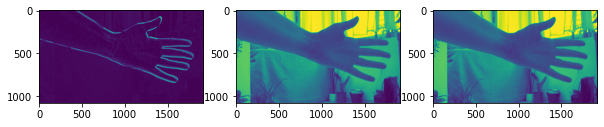

400


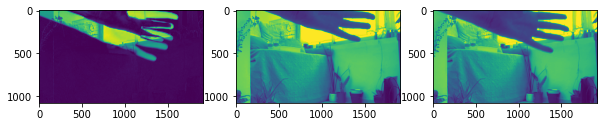

600


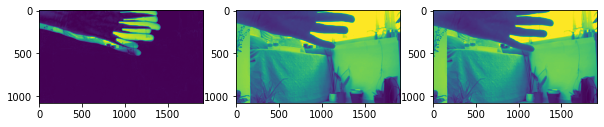

800


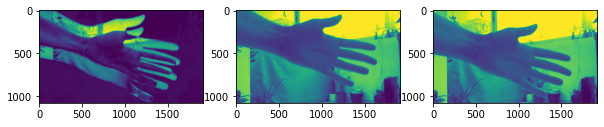

1000


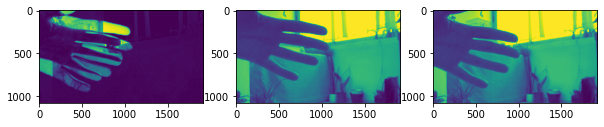

1200


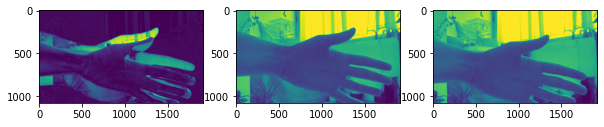

1400


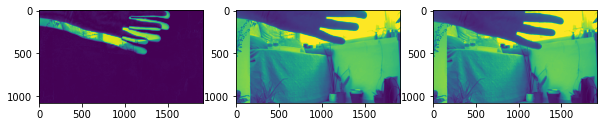

1600


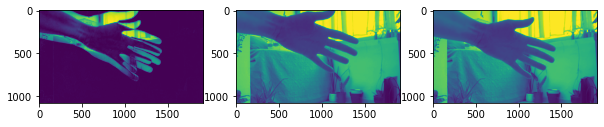

KeyboardInterrupt: ignored

In [15]:
for file_name in os.listdir(path_videos):
    # file_name = 'IMG_3091.MOV'

    print(file_name)    
    cap = cv2.VideoCapture(path_videos+'/'+file_name)

    # Check if camera opened successfully
    if (cap.isOpened()== False): 
        print("Error opening video stream or file")
        continue

    diff_frame=diff

    f=np.zeros((diff_frame,1080,1920))
    # f=np.zeros((diff_frame,352,640))
    

    for frame_number in range(diff_frame):
        ret, frame = cap.read()        
        f[frame_number,:,:] = transform_image(frame)
    frame_number = frame_number + 1
    
    # Read until video is completed
    while(cap.isOpened()):
        # Capture frame-by-frame
        ret, Newframe = cap.read()
        if Newframe is None:
          break
        Newim_gray = transform_image(Newframe)
        difference = abs(Newim_gray - np.squeeze(f[0,:,:]))
        
        Image.fromarray(difference.astype(np.uint8)).save("{}/{}/{}_difference{}-{}.jpeg".format(path_labels, file_name[4:-4], file_name[:-4], frame_number,frame_number-diff))
        # Image.fromarray(difference.astype(np.uint8)).save("{}/{}_difference{}-{}.jpeg".format(path_labels, file_name[:-4], frame_number,frame_number-diff))
        f[0:diff_frame-1,:,:]=f[1:diff_frame,:,:]
        f[diff_frame-1,:,:]=Newim_gray
        frame_number = frame_number + 1
        
        if frame_number%200==0:
           print(frame_number)
           plt.figure(figsize = (10,10))
           plt.subplot(131)
           plt.imshow(difference)#,cmap='gray')
           plt.subplot(132)
           plt.imshow(Newim_gray)#,cmap='gray')
           plt.subplot(133)
           plt.imshow(np.squeeze(f[0,:,:]).astype(np.uint8))#,cmap='gray')
           plt.show()
    # When everything done, release the video capture object
    cap.release()
    
    